#  IMDBMovie Data Scraping Using OMBD API and Exloratory Data Analysis





In [ ]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import requests

In [ ]:
# Api key obtain from signing up at https://www.omdbapi.com/
apiKey = '6f8efbfc'

In [ ]:
movies_dataset = []  #Crating Empty Dataset to Store Movie info from OMDBApi


In [ ]:
#Function to Take Movie Name ant output the ImDB Data
def get_movie_info(MovieTitle):
    movie = MovieTitle.replace(" ", "%20")
    url = 'http://www.omdbapi.com/?apiKey='+apiKey+'&t='+movie
    response = requests.get(url).json()
    if "Error" in response:
      return None
    else :
      Title = response['Title']
      IMDB_Id = response['imdbID']
      IMDB_Id = re.findall('[0-9]+', IMDB_Id)
      Date_of_release = response['Released']
      Genre = response['Genre']
      Cast = response['Actors']
      Plot_Summary = response['Plot']
      IMDB_Ratings = response['imdbRating']
      IMDB_Votes = response['imdbVotes']
      Released_Year = response['Year']
      my_list = [Title, IMDB_Id, Date_of_release, Genre, Cast, Plot_Summary, IMDB_Ratings, IMDB_Votes,Released_Year]
      movies_dataset.append(my_list)
      #print(my_list)

In [ ]:
#Loading the Bollywood Movies Dataset
movie_name = pd.read_excel('/content/Bollywood Movies Dataset.xlsx')
movie_name

,Movie Title
0,3 Idiots
1,Taare Zameen Par
2,PK (film)
3,Dangal (film)
4,Rang De Basanti
...,...
3995,Mehmaan (film)
3996,Sorry Daddy
3997,Raadha Aur Seeta
3998,Dafaa 302


In [ ]:
#Removing the content within the parenthesis from Movie title 
movie_name = movie_name['Movie Title'].str.replace(r"\(.*\)","")
movie_name

0               3 Idiots
1       Taare Zameen Par
2                    PK 
3                Dangal 
4        Rang De Basanti
              ...       
3995            Mehmaan 
3996         Sorry Daddy
3997    Raadha Aur Seeta
3998           Dafaa 302
3999            Calapor 
Name: Movie Title, Length: 4000, dtype: object

### As OMDB free api services allows to excess 1000 request per user, I have split the dateset each with 1000 values to excess each dataframe with different api keys

In [ ]:

df1 = movie_name[0:1000]
df2 = movie_name[1001:2000]
df3 = movie_name[2001:3000]
df4 = movie_name[3001:4000]

In [ ]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(1000,)
(999,)
(999,)
(999,)


### Appling our function to Dataframe

In [ ]:

df1.apply(get_movie_info)


In [ ]:
df2.apply(get_movie_info)


In [ ]:
df3.apply(get_movie_info)


In [ ]:
df4.apply(get_movie_info)


In [ ]:
len(movies_dataset)

3814

### Creating Pandas Dataframe from list which had our Movie information from IMdb

In [ ]:
columns_name = ['Title', 'IMDB_ID',"Date_of_Release", 'Genre','Cast','Plot summary','IMDB Rating','IMDB Votes','Released_Year']
my_df  = pd.DataFrame(movies_dataset, columns=columns_name) # creating empty dataframe
my_df.tail()

,Title,IMDB_ID,Date_of_Release,Genre,Cast,Plot summary,IMDB Rating,IMDB Votes,Released_Year
3809,Mehmaan,[8215918],14 Feb 2018,"Short, Drama","Saheb Bhattacharjee, Koushik Sen, Raima Sen",Somshubhro and Aalo are a happily married coup...,7.1,15,2018
3810,Sorry Daddy,[4994210],11 Sep 2015,Action,"Shamim Khan, Anupam Shukla, Mukesh Tiwari, Tin...",Sorry daddy is a Children story centring aroun...,4.7,6,2015
3811,Raadha Aur Seeta,[0378633],10 Aug 1979,"Drama, Family","Rajendra Nath, Madan Puri, Leela Mishra, Savit...",After having completed his masters with honors...,5.4,7,1979
3812,Dafaa 302: Indian Penal Code Section 302 (Sect...,[0359129],N/A,N/A,"Randhir Kapoor, Rekha, Ajit, Ashok Kumar",Mohan Lal lives in a small rural town in India...,N/A,N/A,1975
3813,Calapor,[3311236],02 Aug 2013,Drama,"Hemant Gopal, Rituparna Sengupta, Akash Sharma","The film is a taut thriller, set in the backdr...",5.2,6,2013


### Saving our Dataframe To CSV

In [ ]:
my_df.to_csv('movies_info.csv')

In [ ]:
movieinfo = pd.read_csv('/content/movies_info.csv')
movieinfo.head()

,Unnamed: 0,Title,IMDB_ID,Date_of_Release,Genre,Cast,Plot summary,IMDB Rating,IMDB Votes,Released_Year
0,0,3 Idiots,['1187043'],25 Dec 2009,"Comedy, Drama","Aamir Khan, Madhavan, Mona Singh",Two friends are searching for their long lost ...,8.4,"360,710",2009
1,1,Taare Zameen Par,['0986264'],21 Dec 2007,"Drama, Family","Darsheel Safary, Aamir Khan, Tisca Chopra",An eight-year-old boy is thought to be a lazy ...,8.4,"178,164",2007
2,2,PK,['2338151'],19 Dec 2014,"Comedy, Drama, Musical","Aamir Khan, Anushka Sharma, Sanjay Dutt",An alien on Earth loses the only device he can...,8.1,"170,150",2014
3,3,Dangal,['5074352'],21 Dec 2016,"Action, Biography, Drama","Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh",Former wrestler Mahavir Singh Phogat and his t...,8.4,"166,872",2016
4,4,Rang De Basanti,['0405508'],26 Jan 2006,"Comedy, Crime, Drama","Aamir Khan, Soha Ali Khan, Siddharth",The story of six young Indians who assist an E...,8.1,"115,406",2006


In [ ]:
movieinfo.shape

(3814, 10)

In [ ]:
movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3814 non-null   int64  
 1   Title            3814 non-null   object 
 2   IMDB_ID          3814 non-null   object 
 3   Date_of_Release  3062 non-null   object 
 4   Genre            3755 non-null   object 
 5   Cast             3801 non-null   object 
 6   Plot summary     3711 non-null   object 
 7   IMDB Rating      3743 non-null   float64
 8   IMDB Votes       3751 non-null   object 
 9   Released_Year    3814 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 298.1+ KB


### From above Observation, We obtained 3814 out of 4000 Movies Names, We lost some information due to Movie Name Mistype

## Cleaning The Dataset

In [ ]:
movieinfo['Released_Year'].unique()

array(['2009', '2007', '2014', '2016', '2006', '2001', '2010', '2004',
       '2012', '2003', '2015', '2011', '1995', '2013', '2017', '2008',
       '2018', '2000', '1975', '1996', '1994', '1998', '2002', '2005',
       '1993', '1971', '1999', '2019', '1992', '1997', '1987', '1966',
       '1988', '1983', '1989', '2011–2012', '1957', '2013–2021', '1965',
       '1960', '1948', '1977', '1991', '1968', '1990', '1982', '1970',
       '1994–1996', '1973', '1976', '1972', '1951', '1964', '1984',
       '1981', '1978', '1955', '1980', '1961', '2020', '1979',
       '2006–2010', '1932', '2018–2020', '1959', '2015–', '2011–2019',
       '1999–2022', '2014–2015', '2011–2013', '1986', '1967', '1953',
       '2021', '1969', '1962', '1985', '1958', '2016–', '1974', '2014–',
       '2000–', '1963', '1954', '1952', '1998–2000', '1929', '1998–2018',
       '2004–2005', '1949', '1941', '2003–2006', '2020–', '1956',
       '1994–1995', '2021–', '1995–2006', '2013–2014', '1995–',
       '1997–1998', '20

### We see some inconsistent value in Year of Released, Dropping the 

In [ ]:
movieinfo = pd.read_csv('/content/movies_info.csv')


In [ ]:
# Getting Index of Rows with inconsistent Released Year
index = movieinfo[movieinfo['Released_Year'].map(len) > 4].index
index

Int64Index([ 249,  306,  470,  566,  678,  733,  746,  756,  759,  774,  783,
             800,  983, 1143, 1164, 1172, 1265, 1284, 1295, 1421, 1432, 1683,
            1782, 1921, 1975, 2117, 2154, 2161, 2191, 2242, 2278, 2297, 2335,
            2339, 2352, 2379, 2401, 2407, 2477, 2573, 2591, 2638, 2653, 2699,
            2709, 2755, 2875, 2884, 3167, 3235, 3265, 3283, 3516, 3532, 3556,
            3626, 3632, 3668, 3686, 3697, 3729],
           dtype='int64')

In [ ]:
movieinfo.shape

(3814, 10)

In [ ]:
#Deleting rows with Inconsiatent Released Year From Dataftame
movieinfo.drop(index, inplace = True)

In [ ]:
movieinfo.shape

(3753, 10)

In [ ]:
movieinfo['Released_Year'].unique()

array(['2009', '2007', '2014', '2016', '2006', '2001', '2010', '2004',
       '2012', '2003', '2015', '2011', '1995', '2013', '2017', '2008',
       '2018', '2000', '1975', '1996', '1994', '1998', '2002', '2005',
       '1993', '1971', '1999', '2019', '1992', '1997', '1987', '1966',
       '1988', '1983', '1989', '1957', '1965', '1960', '1948', '1977',
       '1991', '1968', '1990', '1982', '1970', '1973', '1976', '1972',
       '1951', '1964', '1984', '1981', '1978', '1955', '1980', '1961',
       '2020', '1979', '1932', '1959', '1986', '1967', '1953', '2021',
       '1969', '1962', '1985', '1958', '1974', '1963', '1954', '1952',
       '1929', '1949', '1941', '1956', '1943', '1950', '1947', '1931',
       '1924', '1946', '1936'], dtype=object)

In [ ]:
movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3753 entries, 0 to 3813
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3753 non-null   int64  
 1   Title            3753 non-null   object 
 2   IMDB_ID          3753 non-null   object 
 3   Date_of_Release  3009 non-null   object 
 4   Genre            3695 non-null   object 
 5   Cast             3741 non-null   object 
 6   Plot summary     3663 non-null   object 
 7   IMDB Rating      3697 non-null   float64
 8   IMDB Votes       3701 non-null   object 
 9   Released_Year    3753 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 322.5+ KB


In [ ]:
#To Further process we need to convert object Datatype to Numeric
movieinfo['Released_Year'] = movieinfo['Released_Year'].apply(pd.to_numeric)
movieinfo['IMDB Rating'] = movieinfo['IMDB Rating'].apply(pd.to_numeric)
#movieinfo['IMDB Votes'] = movieinfo['IMDB Votes'].apply(pd.to_numeric)

In [ ]:
movieinfo["IMDB Votes"] = movieinfo["IMDB Votes"].str.replace(",","").astype(float) # Removing Commas from IMDB votes columns
movieinfo['IMDB Votes'] = movieinfo['IMDB Votes'].apply(pd.to_numeric)


In [ ]:
movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3753 entries, 0 to 3813
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3753 non-null   int64  
 1   Title            3753 non-null   object 
 2   IMDB_ID          3753 non-null   object 
 3   Date_of_Release  3009 non-null   object 
 4   Genre            3695 non-null   object 
 5   Cast             3741 non-null   object 
 6   Plot summary     3663 non-null   object 
 7   IMDB Rating      3697 non-null   float64
 8   IMDB Votes       3701 non-null   float64
 9   Released_Year    3753 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 322.5+ KB


In [ ]:
movieinfo['Age_of_content(inYears)'] = 2021 - movieinfo['Released_Year']

In [ ]:
movieinfo.tail()

,Unnamed: 0,Title,IMDB_ID,Date_of_Release,Genre,Cast,Plot summary,IMDB Rating,IMDB Votes,Released_Year,Age_of_content(inYears)
3809,3809,Mehmaan,['8215918'],14 Feb 2018,"Short, Drama","Saheb Bhattacharjee, Koushik Sen, Raima Sen",Somshubhro and Aalo are a happily married coup...,7.1,15.0,2018,3
3810,3810,Sorry Daddy,['4994210'],11 Sep 2015,Action,"Shamim Khan, Anupam Shukla, Mukesh Tiwari, Tin...",Sorry daddy is a Children story centring aroun...,4.7,6.0,2015,6
3811,3811,Raadha Aur Seeta,['0378633'],10 Aug 1979,"Drama, Family","Rajendra Nath, Madan Puri, Leela Mishra, Savit...",After having completed his masters with honors...,5.4,7.0,1979,42
3812,3812,Dafaa 302: Indian Penal Code Section 302 (Sect...,['0359129'],NaN,NaN,"Randhir Kapoor, Rekha, Ajit, Ashok Kumar",Mohan Lal lives in a small rural town in India...,NaN,NaN,1975,46
3813,3813,Calapor,['3311236'],02 Aug 2013,Drama,"Hemant Gopal, Rituparna Sengupta, Akash Sharma","The film is a taut thriller, set in the backdr...",5.2,6.0,2013,8


## Calulating Popularity Score of Movie by using IMDB Formula

From IMDB:
http://www.imdb.com/chart/top

The formula for calculating the Top Rated 250 Titles gives a true Bayesian estimate: weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:

* R = average for the movie (mean) = (Rating)
* v = number of votes for the movie = (votes)
* m = minimum votes required to be listed in the Top 250 (currently 3000)
* C = the mean vote across the whole report (currently 6.9)



[Source](https://www.quora.com/How-does-IMDB-compute-popularity)

In [ ]:
movieinfo['Movie Popularity'] = (movieinfo['IMDB Votes']/(movieinfo['IMDB Votes']+ 3000)) * movieinfo['IMDB Rating'] + (3000 /(movieinfo['IMDB Votes']+ 3000)) * 6.9

In [ ]:
movieinfo.head(2)

In [ ]:
# Due to similarity in names, we got info of joker(Joaquin Phoenix) instaed of Joker(Akshay Kumar)  and Star wars instaed of Hindi Movie Stars, Deleting such instances instance from df
index1 = [425, 2276, 1723]
movieinfo.drop(index1, inplace = True)

In [ ]:
movieinfo.sort_values(by='Movie Popularity', ascending=False).head(10)

,Unnamed: 0,Title,IMDB_ID,Date_of_Release,Genre,Cast,Plot summary,IMDB Rating,IMDB Votes,Released_Year,Age_of_content(inYears),Movie Popularity
2776,2776,Star Wars,['0076759'],25 May 1977,"Action, Adventure, Fantasy","Mark Hamill, Harrison Ford, Carrie Fisher",Luke Skywalker joins forces with a Jedi Knight...,8.6,1259440.0,1977,44,8.595960
0,0,3 Idiots,['1187043'],25 Dec 2009,"Comedy, Drama","Aamir Khan, Madhavan, Mona Singh",Two friends are searching for their long lost ...,8.4,360710.0,2009,12,8.387628
1,1,Taare Zameen Par,['0986264'],21 Dec 2007,"Drama, Family","Darsheel Safary, Aamir Khan, Tisca Chopra",An eight-year-old boy is thought to be a lazy ...,8.4,178164.0,2007,14,8.375161
3,3,Dangal,['5074352'],21 Dec 2016,"Action, Biography, Drama","Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh",Former wrestler Mahavir Singh Phogat and his t...,8.4,166872.0,2016,5,8.373509
133,133,Black Friday,['0400234'],09 Feb 2007,"Action, Crime, Drama","Kay Kay Menon, Pawan Malhotra, Aditya Srivastav",A film about the investigations following the ...,8.5,19843.0,2004,17,8.289870
136,136,Tumbbad,['8239946'],12 Oct 2018,"Drama, Fantasy, Horror","Sohum Shah, Jyoti Malshe, Anita Date",A mythological story about a goddess who creat...,8.3,35055.0,2018,3,8.189633
86,86,Anand,['0066763'],12 Mar 1971,"Drama, Musical","Rajesh Khanna, Amitabh Bachchan, Sumita Sanyal",The story of a terminally ill man who wishes t...,8.3,32361.0,1971,50,8.181225
8,8,Gangs of Wasseypur,['1954470'],22 Jun 2012,"Action, Crime, Drama","Manoj Bajpayee, Richa Chadha, Nawazuddin Siddiqui",NaN,8.2,88161.0,2012,9,8.157219
7,7,"Swades: We, the People",['0367110'],17 Dec 2004,Drama,"Shah Rukh Khan, Gayatri Joshi, Kishori Ballal",A successful Indian scientist returns to an In...,8.2,86240.0,2004,17,8.156298
24,24,Andhadhun,['8108198'],05 Oct 2018,"Crime, Drama, Music","Ayushmann Khurrana, Tabu, Radhika Apte",A series of mysterious events change the life ...,8.2,80201.0,2018,3,8.153126


### Above Dataframe Gives Top 10 Movie based on popularity Score

## Exploratory Data Analysis

## Cast Popularity based on the Number of Movies they have appeared.

In [ ]:
# Replacing the NAn value with unknown
movieinfo['Cast'] = movieinfo['Cast'].fillna("Unknown")


In [ ]:
actors_list = []
for movie_actors in movieinfo['Cast']:
  actors_list.append([e.strip() for e in movie_actors.split(',')])

In [ ]:
actor_dict = {}
for actor in actors_list:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] = 1
actor_dict


In [ ]:
actor_data = sorted(actor_dict.items(), key=lambda x: x[1], reverse=True)
actors_data = actor_data[:10]

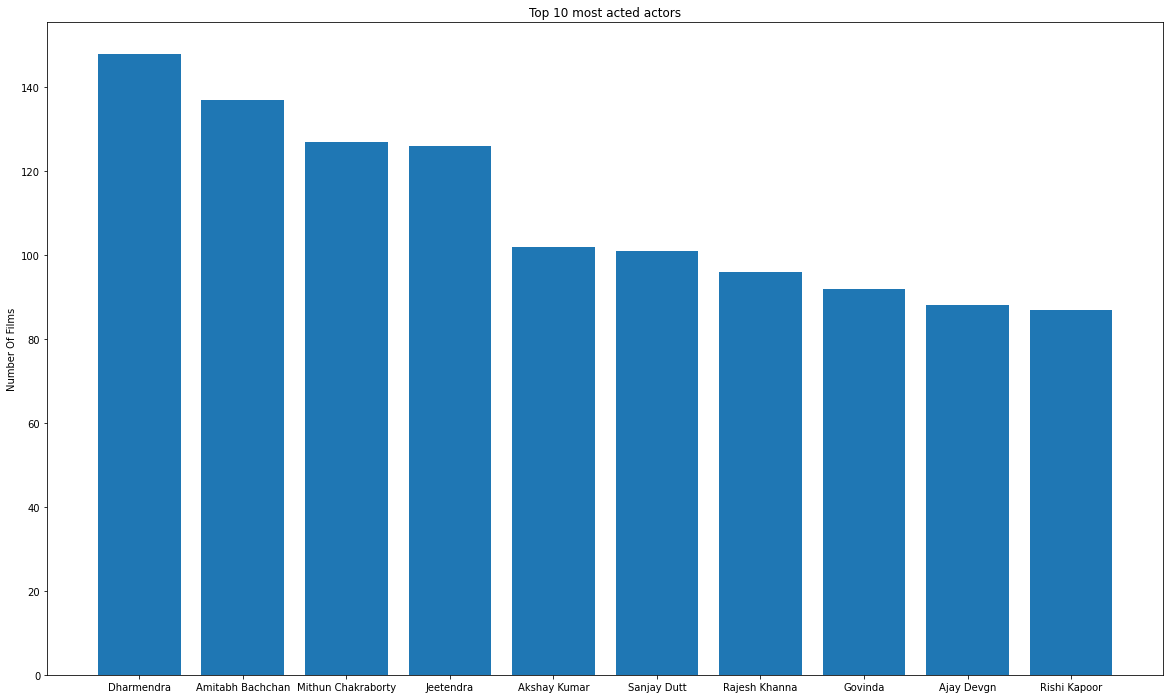

In [ ]:
actor =list(zip(*actors_data))[0]
score = list(zip(*actors_data))[1]
x_pos = np.arange(len(actor)) 

plt.figure(figsize=(20,12))
plt.title("Top 10 most acted actors")
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, actor) 
plt.ylabel('Number Of Films')
plt.show()

### Above BarCharts show Top 10 Actors

## Genre Diistribution 


In [ ]:
#Genre Diistribution 

movieinfo['Genre'] = movieinfo['Genre'].fillna("Unknown") # Replacing the NAn value with unknown

genre_list = []
for movie_genre in movieinfo['Genre']:
  genre_list.append([e.strip() for e in movie_genre.split(',')])
genre_list

In [ ]:
genre_dict = {}
for genre in genre_list:
    for a in genre:
        if a in genre_dict:
            genre_dict[a] +=1
        else:
            genre_dict[a] = 1
 
genre_dict= sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)
genre_dict

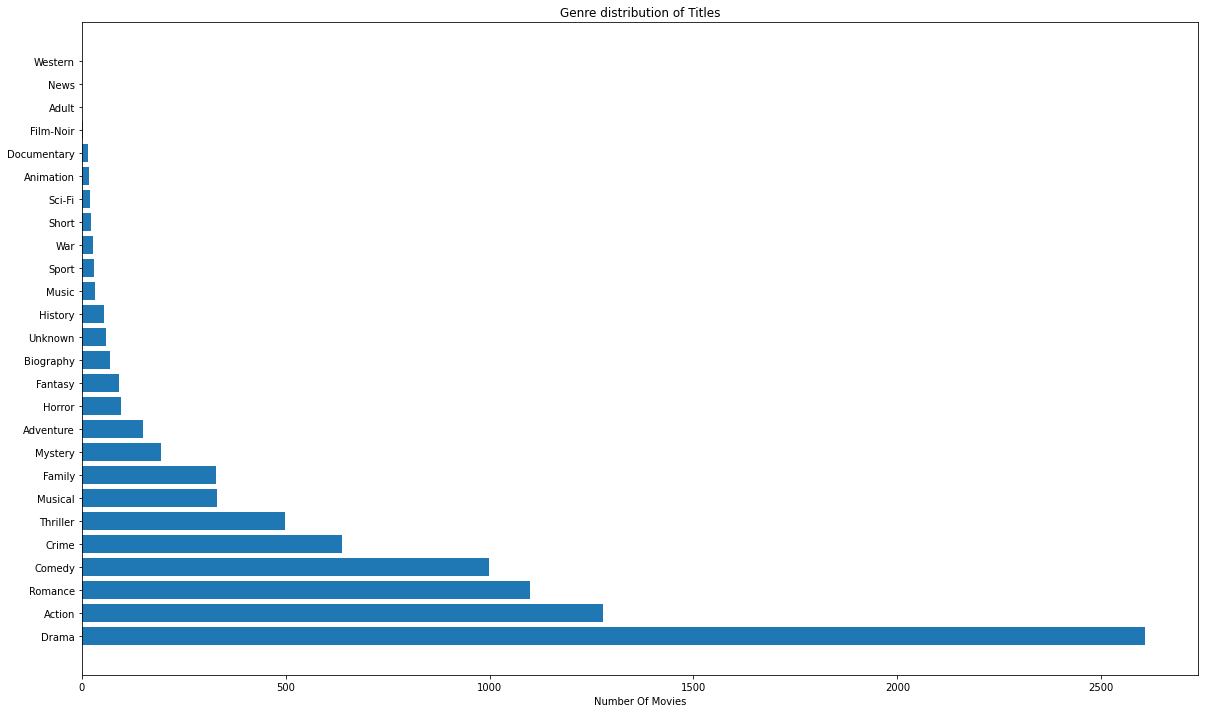

In [ ]:
genre =list(zip(*genre_dict))[0]
score = list(zip(*genre_dict))[1]
x_pos = np.arange(len(genre)) 

plt.figure(figsize=(20,12))
plt.title("Genre distribution of Titles")
plt.barh(x_pos, score,align='center')
plt.yticks(x_pos, genre) 
plt.xlabel('Number Of Movies')
plt.show()

### From Above distribution it seems maximum of the movie are of Genre Drama